In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Boston House Pricing Dataset


In [4]:
boston= pd.read_csv('C:/Users/AmritKeshri/Downloads/HousingData.csv')

In [5]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# Preparng the dataset

CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per 10,000usd
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
boston.rename(columns = {'MEDV':'Price'}, inplace = True)
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Describing the Dataset

In [9]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Checking the Missing Values

In [10]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

Exploratory Data Analysis

In [11]:
#Replacing the NAN values with the mean

In [12]:
boston['CRIM']=boston['CRIM'].replace(np.NAN,boston['CRIM'].mean())
boston['ZN']=boston['ZN'].replace(np.NAN,boston['ZN'].mean())
boston['INDUS']=boston['INDUS'].replace(np.NAN,boston['INDUS'].mean())
boston['CHAS']=boston['CHAS'].replace(np.NAN,boston['CHAS'].mean())
boston['AGE']=boston['AGE'].replace(np.NAN,boston['AGE'].mean())
boston['LSTAT']=boston['LSTAT'].replace(np.NAN,boston['LSTAT'].mean())

In [13]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

Checking for correlation

In [14]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


Text(0, 0.5, 'Price')

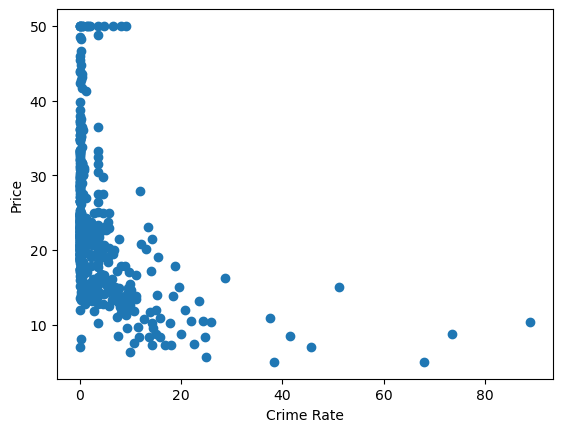

In [15]:
plt.scatter(boston['CRIM'],boston['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

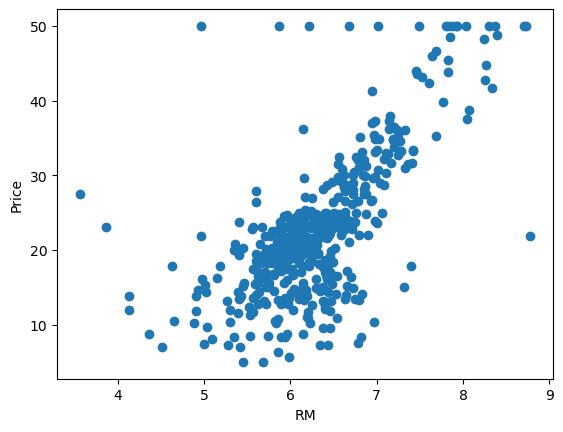

In [16]:
plt.scatter(boston['RM'],boston['Price'])
plt.xlabel('RM')
plt.ylabel('Price')

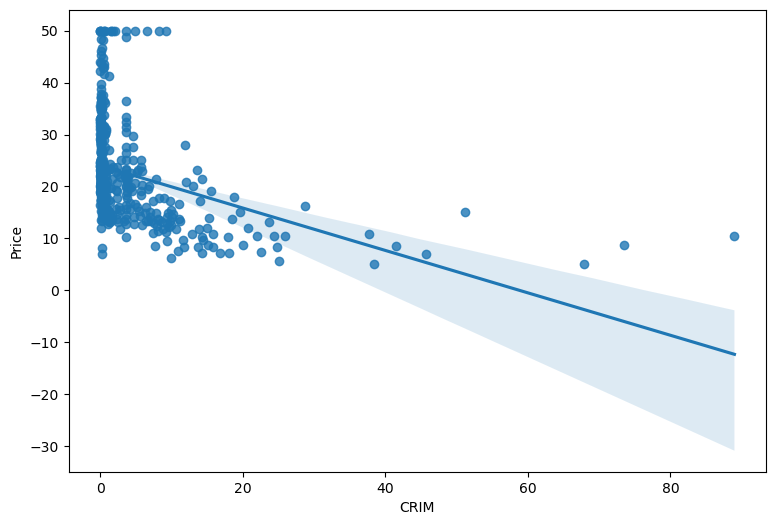

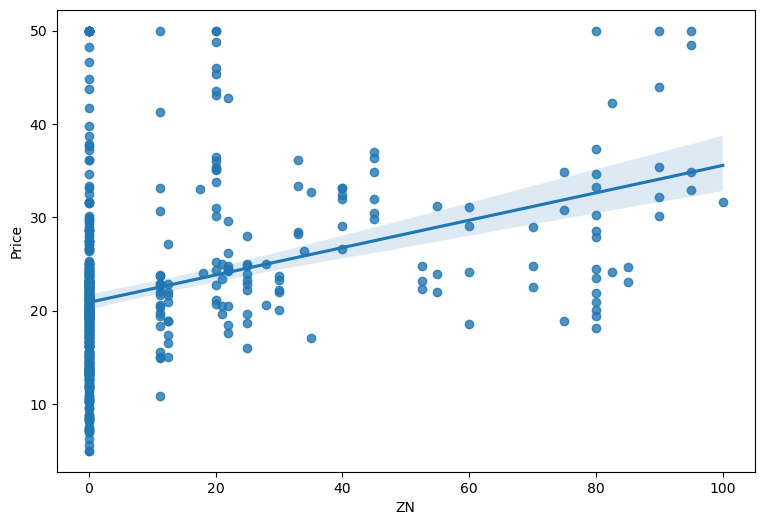

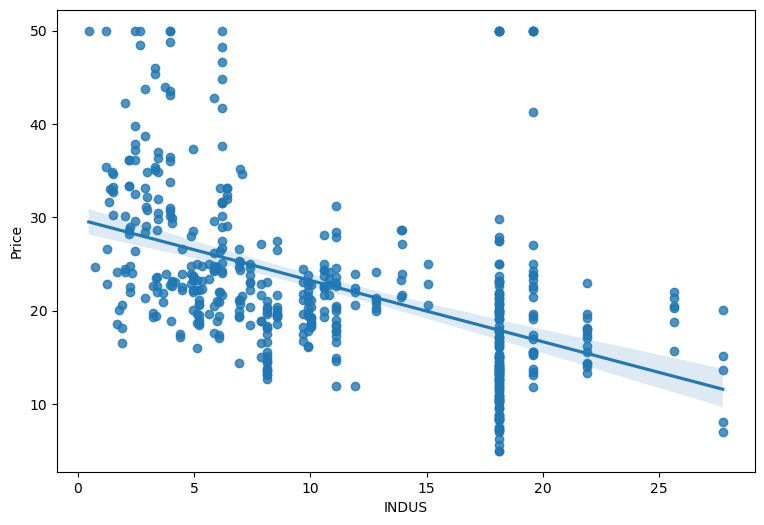

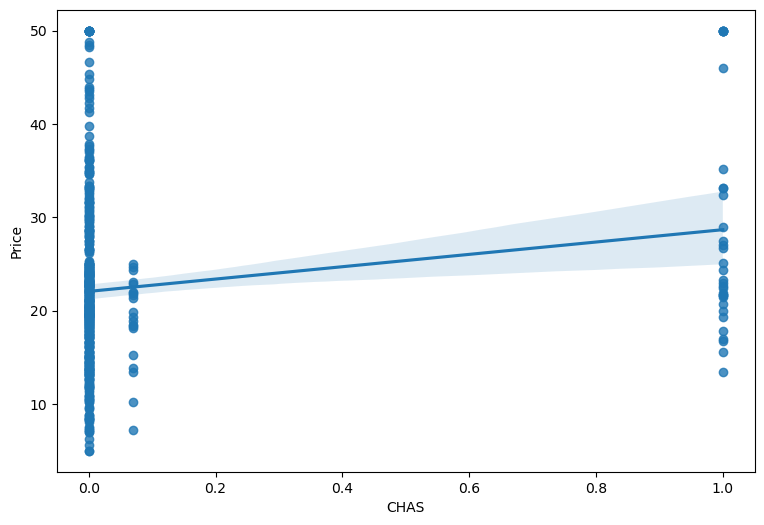

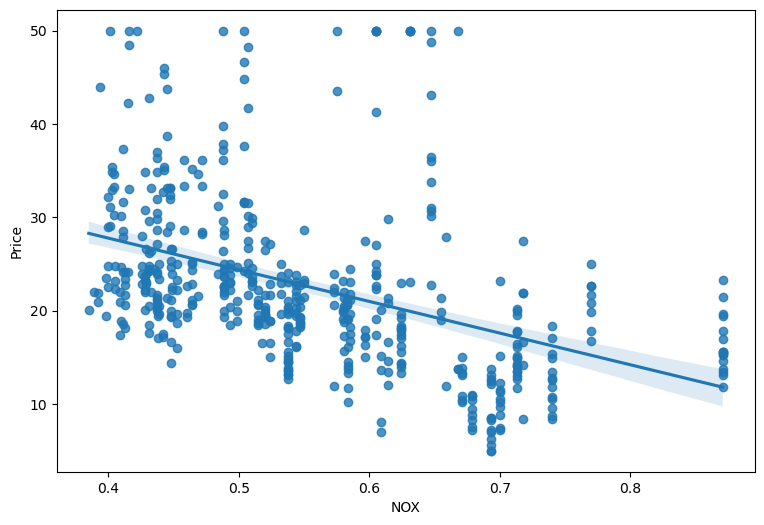

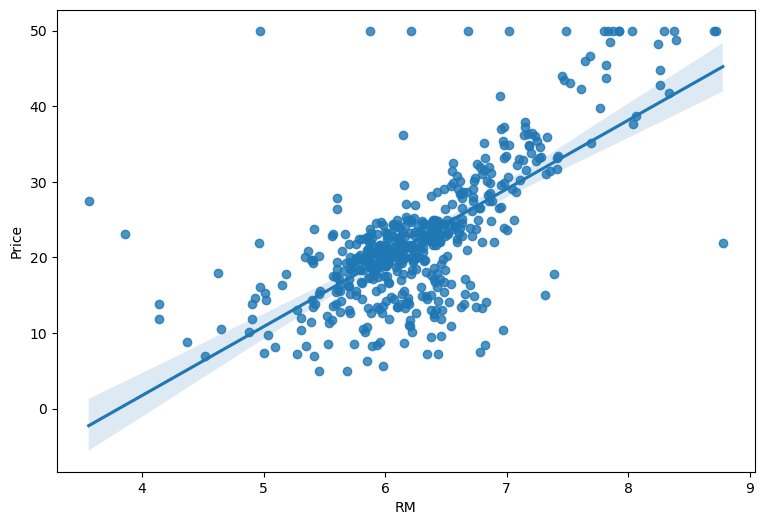

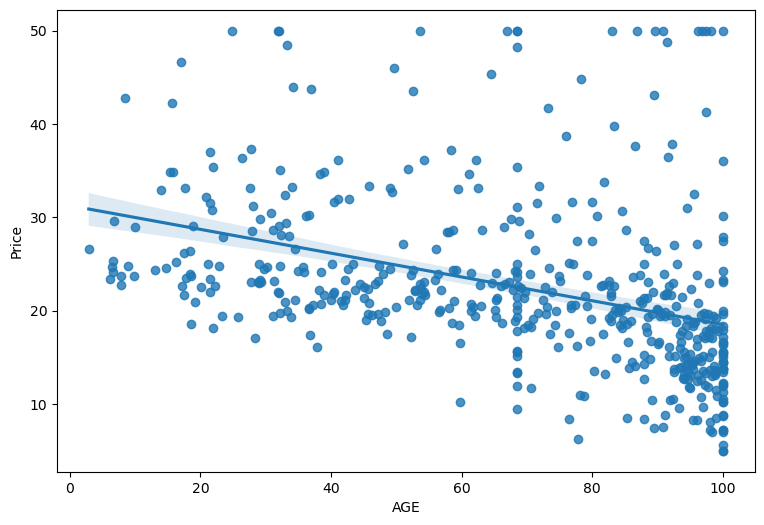

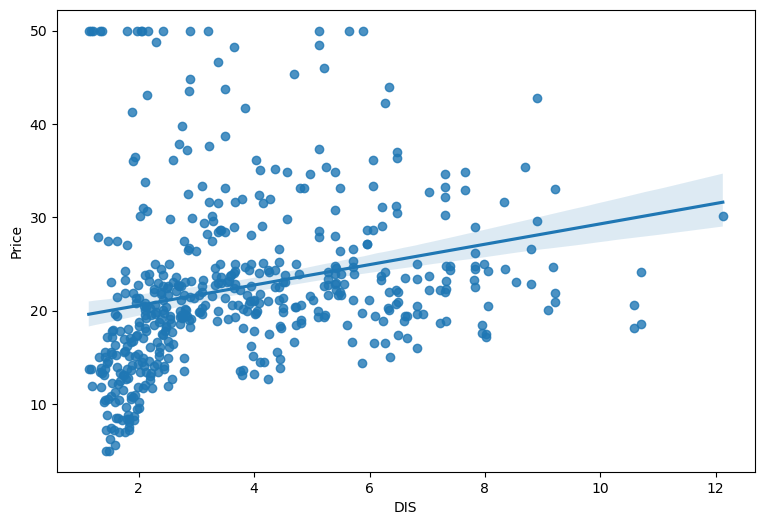

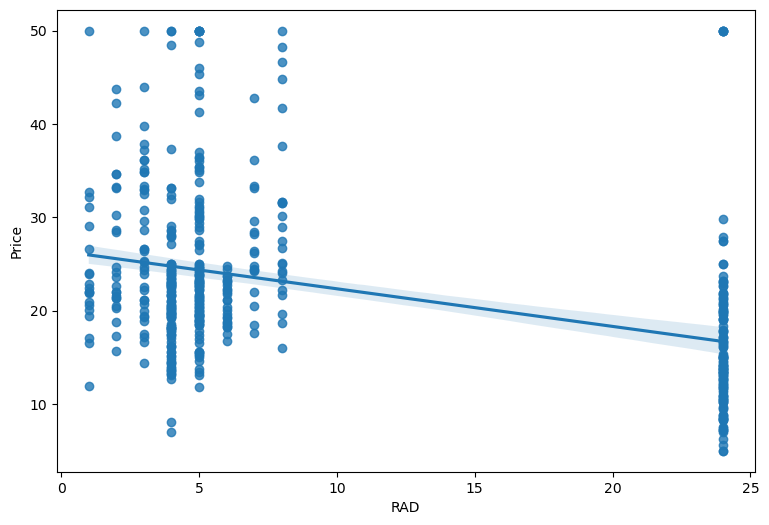

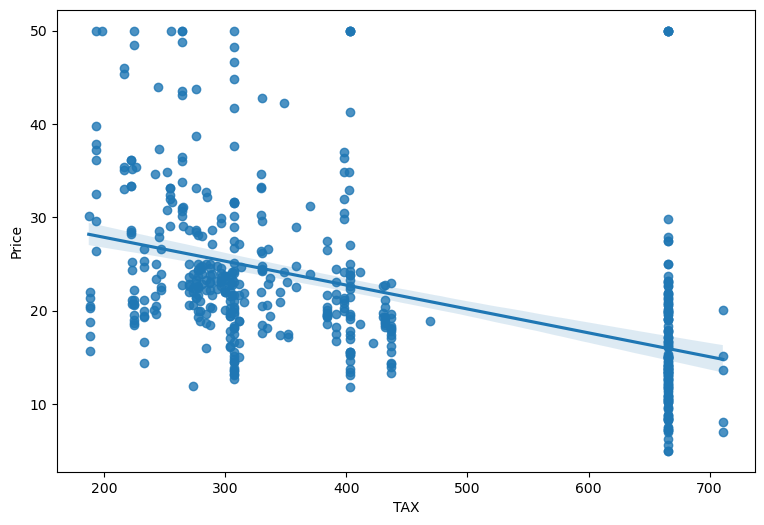

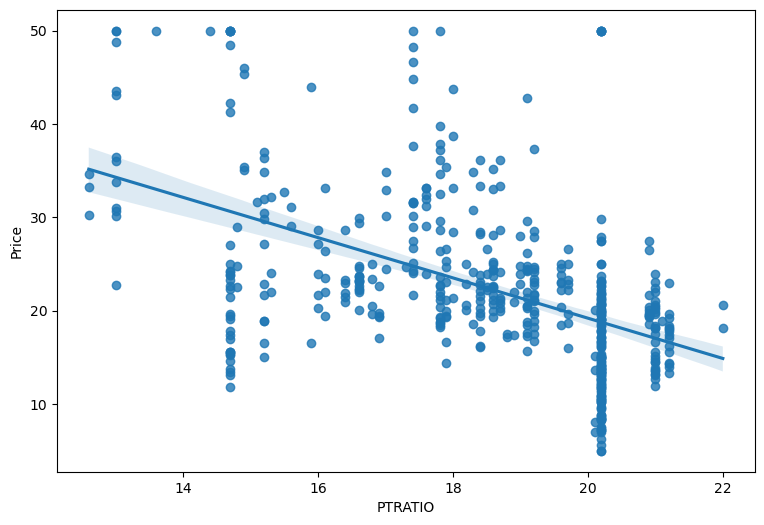

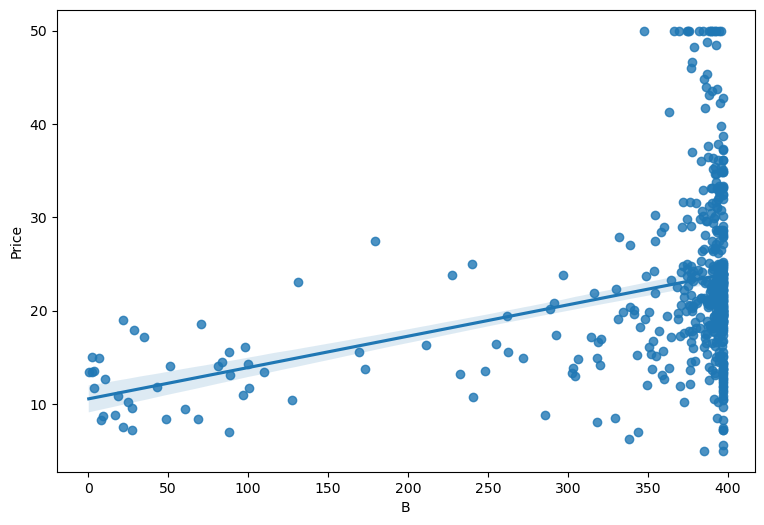

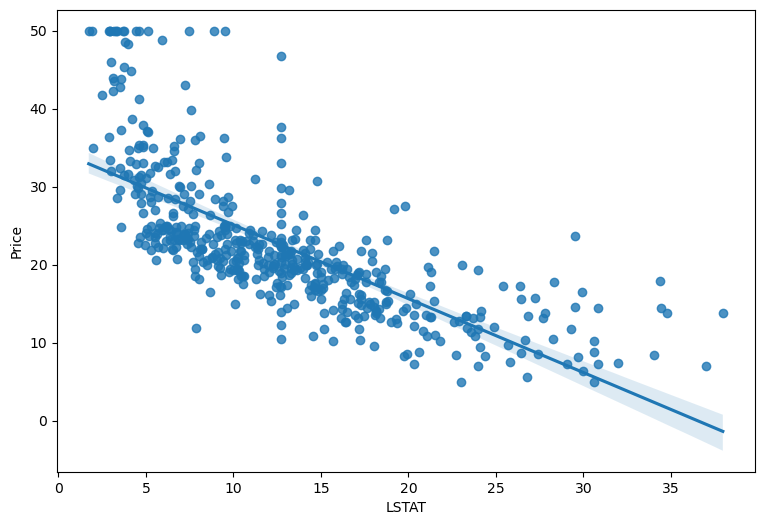

In [17]:
for col in boston.iloc[:,:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = boston[col]
    label = boston['Price']
    correlation = feature.corr(label)
    sns.regplot(x=feature, y=label,data=boston)
    plt.xlabel(col)
    plt.ylabel('Price')

<Axes: >

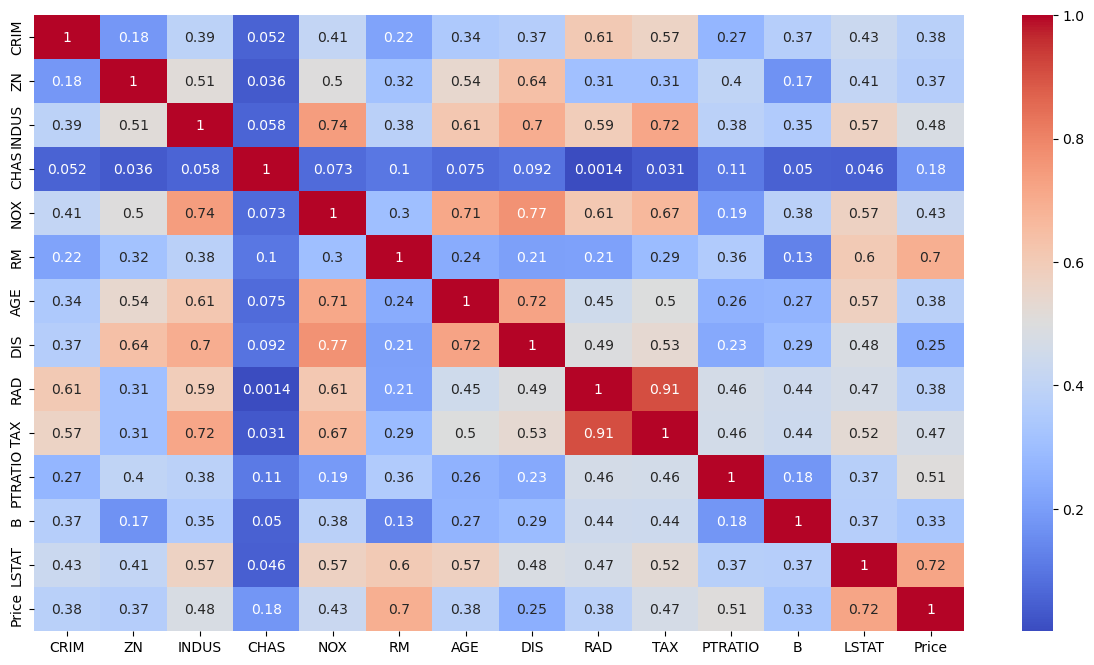

In [18]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = boston.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return (vif)

In [20]:
calc_vif(boston[[i for i in boston.describe().columns if i not in ['CHAS','Price','RAD','PTRATIO','INDUS','RM','LSTAT','AGE','NOX']]])


,variables,VIF
0,CRIM,1.799863
1,ZN,2.059460
2,DIS,7.286164
3,TAX,6.156577
4,B,9.300320


Seperating Independent and Dependent features

In [21]:
X=boston.iloc[:,:-1]
y=boston.iloc[:,-1]

Train Test Split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

Standarize the dataset

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

Model Training

In [26]:
regression=LinearRegression()

In [27]:
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
##printing the coefficients and intercept
print(regression.coef_)

[-1.06184703  0.71347682 -0.07272768  0.94344207 -1.62856223  3.17333232
 -0.70109167 -3.04177516  1.69879013 -1.20047368 -1.99733627  1.02127847
 -3.28653232]


In [29]:
print(regression.intercept_)

23.01581920903955


In [30]:
##on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Prediction with test data

In [31]:
reg_pred=regression.predict(X_test)

In [32]:
reg_pred

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

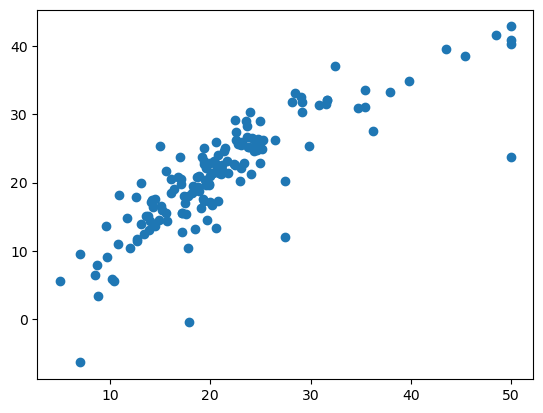

In [33]:
##plot a scatter plot 
plt.scatter(y_test,reg_pred)

In [34]:
# Residuals
residuals=y_test-reg_pred


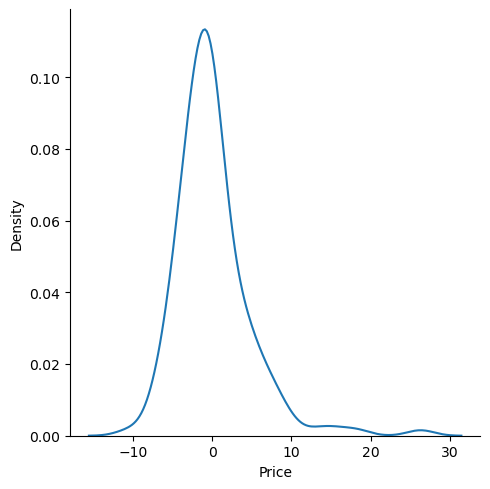

In [35]:
# Residual plot
sns.displot(residuals,kind="kde")

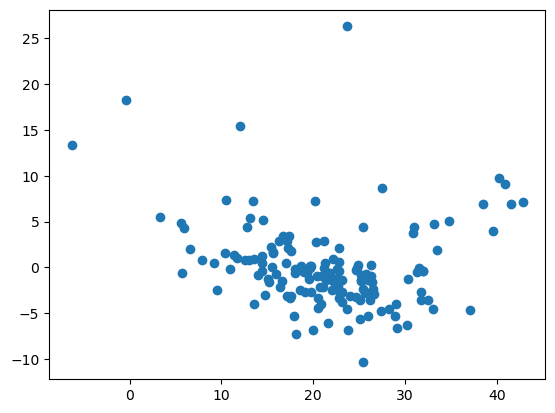

In [36]:
#scatter plot with respect to prediction and residual
plt.scatter(reg_pred,residuals)
#uniform distribution

Performace Metrics to check the performance of Model

In [37]:
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.141052567108469
21.81845795352606
4.67102322339828


R Square and adjusted R Square
R^2 = 1-SSR/SST
R^2 = coefficient of determination SSR= sum pf squares of residuas SST = total sum of squares

In [38]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7071862632031753


Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]
where:
R2: The R2 of the model n: The number of observations k:The number of predictoe variable

In [39]:
1-(1-score) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) 

0.6796023604614455

Pickling the model file for Deployement

In [40]:
import pickle

In [41]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [42]:
pickle_model=pickle.load(open('regmodel.pkl','rb'))